Miłosz Błachowiak

Data Analytics - Lab 1 - Random data visualisation and sampling

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd

2. Using numpy.random generate arrays

In [193]:
# uniform distribution
interval = [0, 1]
uniform = np.random.uniform(low=interval[0], high=interval[1], size=1000)

In [194]:
# normal distribution (mean=0, std_dev = 1)
mean = 0
std_dev = 1
normal1 = np.random.normal(loc=mean, scale=std_dev, size=1000)

In [195]:
# normal distribution (mean=0, std_dev = 10)
mean = 0
std_dev = 10
normal2 = np.random.normal(loc=mean, scale=std_dev, size=1000)

In [196]:
# beta distribution
alpha = [1.0, 2.0, 3.0]
beta = [1.0, 2.0, 9.0]
beta1 = np.random.beta(a=alpha[0], b=beta[0], size=1000)
beta2 = np.random.beta(a=alpha[1], b=beta[1], size=1000)
beta3 = np.random.beta(a=alpha[2], b=beta[2], size=1000)

In [197]:
# two-dimensional normal distribution
mean = [0, 0]
cov1 = [[1, 0], [0, 1]]
cov2 = [[2, 1], [1, 2]]

normal1_2D = np.random.multivariate_normal(mean=mean, cov=cov1, size=10000)
normal2_2D = np.random.multivariate_normal(mean=mean, cov=cov2, size=10000)

3. For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).

Text(0, 0.5, 'Number of samples')

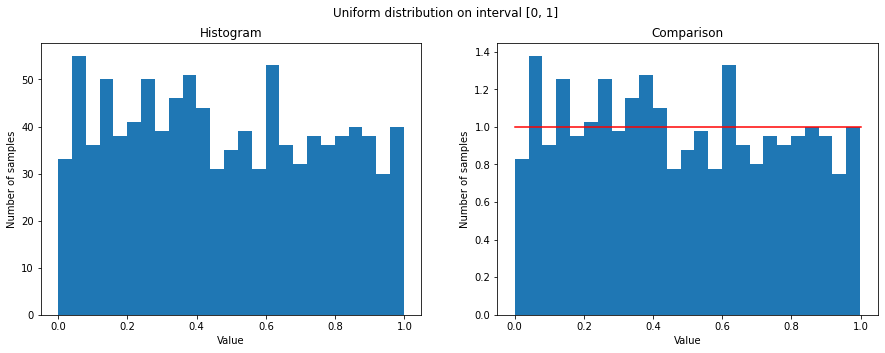

In [198]:
# uniform distribution
n_bins=25

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Uniform distribution on interval [0, 1]")

ax1.hist(uniform, bins=n_bins)
ax1.set_title("Histogram")
ax1.set_xlabel("Value")
ax1.set_ylabel("Number of samples")

# plotting normalized histogram (density = True)
ax2.hist(uniform, bins=n_bins, density=True)

#1/(b-a)
y = 1 / (interval[1] - interval[0])
x = np.linspace(interval[0], interval[1], 50)

ax2.plot(x, [y] * 50, 'r')
ax2.set_title("Comparison")
ax2.set_xlabel("Value")
ax2.set_ylabel("Number of samples")


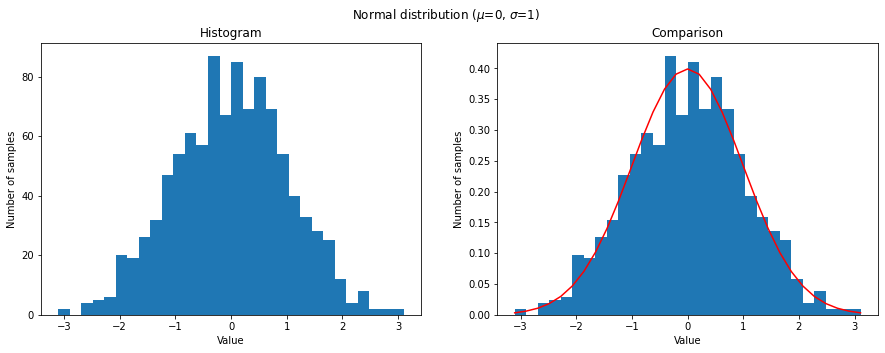

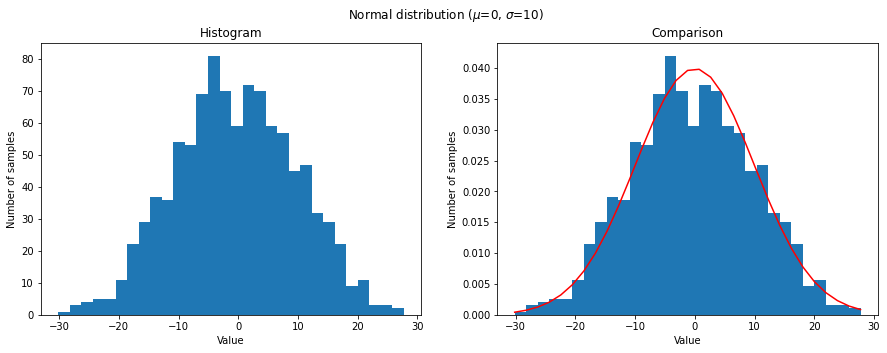

In [199]:
# normal distribution (mean=0, std_dev = 1)
def plot_normal_hist(data, n_bins, axis, density=False):
    hist, bins, p = axis.hist(data, bins=n_bins, density=density)
    axis.set_title("Histogram")
    axis.set_xlabel("Value")
    axis.set_ylabel("Number of samples")
    return bins

def plot_comparison_normal(x, mean, std_dev, axis):
    # analytical formula
    y = np.exp((-1 / 2 * ((x - mean) / std_dev) ** 2)) / (np.sqrt(2 * np.pi) * std_dev)
    axis.plot(x, y, 'r')
    axis.set_title("Comparison")
    axis.set_xlabel("Value")
    axis.set_ylabel("Number of samples")


n_bins=30

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(r'Normal distribution ($\mu$=0, $\sigma$=1)')
plot_normal_hist(normal1, n_bins=n_bins, axis=ax1)
bins = plot_normal_hist(normal1, n_bins=n_bins, axis=ax2, density=True)
mean = 0
std_dev = 1
plot_comparison_normal(bins, mean, std_dev, axis=ax2)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(r'Normal distribution ($\mu$=0, $\sigma$=10)')
plot_normal_hist(normal2, n_bins=n_bins, axis=ax1)
bins = plot_normal_hist(normal2, n_bins=n_bins, axis=ax2, density=True)
mean = 0
std_dev = 10
plot_comparison_normal(bins, mean, std_dev, axis=ax2)


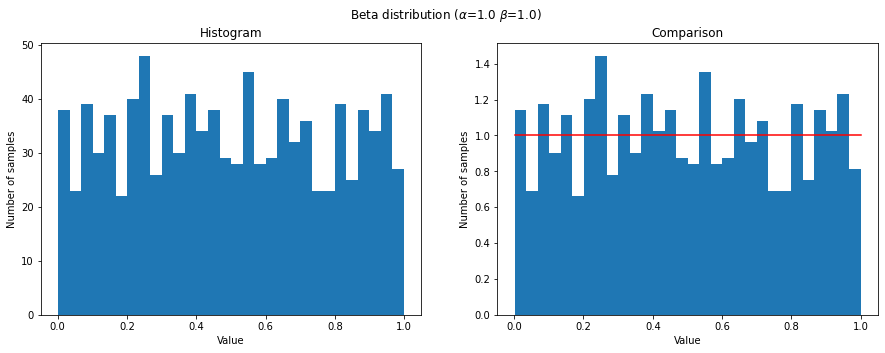

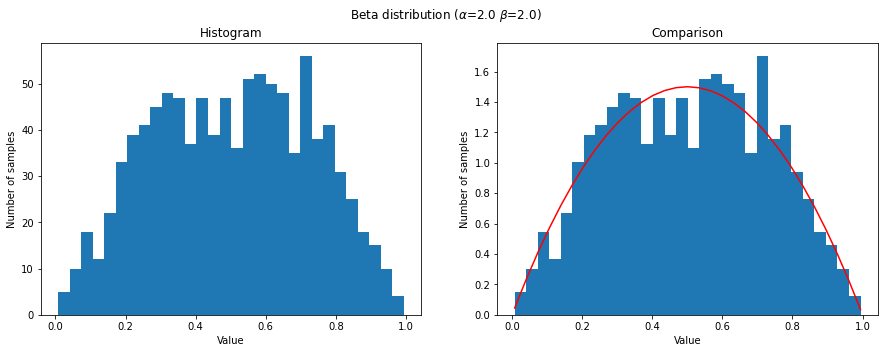

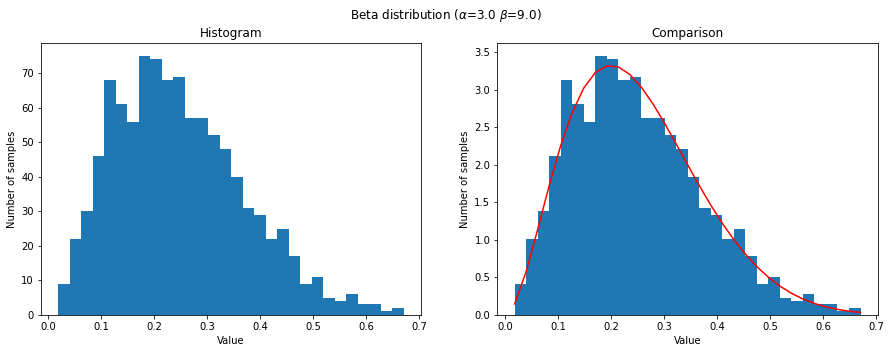

In [200]:
# beta distribution
def plot_beta_hist(data, n_bins, axis, density=False):
    hist, bins, p = axis.hist(data, bins=n_bins, density=density)
    axis.set_title("Histogram")
    axis.set_xlabel("Value")
    axis.set_ylabel("Number of samples")
    return bins

def plot_comparison_beta(x, alpha, beta, axis):
    y = stats.beta.pdf(x, alpha, beta)
    axis.plot(x, y, 'r')
    axis.set_title("Comparison")
    axis.set_xlabel("Value")
    axis.set_ylabel("Number of samples")


n_bins=30

# alpha = 1, beta = 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(r'Beta distribution ($\alpha$=' + str(alpha[0]) + r' $\beta$=' + str(beta[0]) + r')')
plot_beta_hist(beta1, n_bins, ax1)
bins = plot_beta_hist(beta1, n_bins, ax2, density=True) # normalized histogram
plot_comparison_beta(bins, alpha[0], beta[0], ax2)


# alpha = 2, beta = 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(r'Beta distribution ($\alpha$=' + str(alpha[1]) + r' $\beta$=' + str(beta[1]) + r')')
plot_beta_hist(beta2, n_bins, ax1)
bins = plot_beta_hist(beta2, n_bins, ax2, density=True) # normalized histogram
plot_comparison_beta(bins, alpha[1], beta[1], ax2)


# alpha = 3, beta = 9
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(r'Beta distribution ($\alpha$=' + str(alpha[2]) + r' $\beta$=' + str(beta[2]) + r')')
plot_beta_hist(beta3, n_bins, ax1)
bins = plot_beta_hist(beta3, n_bins, ax2, density=True) # normalized histogram
plot_comparison_beta(bins, alpha[2], beta[2], ax2)


4. For two-dimensional distributions use hist2d method from pyplot. Try to analyze influence of bins. Try different 2d histogram functions (ex. from seaborn).

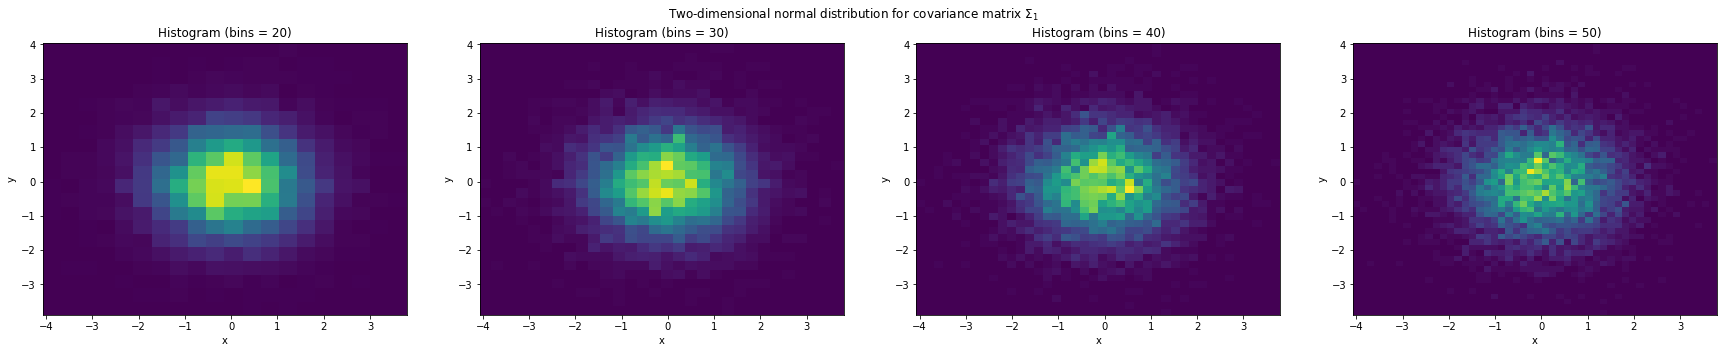

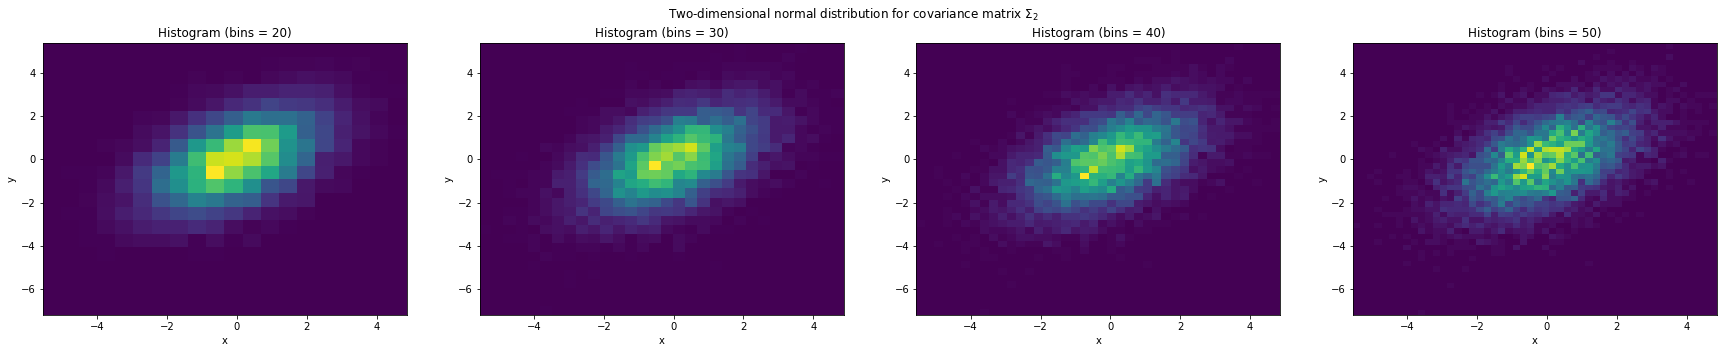

In [201]:
def plot_hist2d(data, bins, axis):
    axis.hist2d(data[:, 0], data[:, 1], bins=bins)
    axis.set_title("Histogram (bins = " + str(bins) + ")")
    axis.set_xlabel("x")
    axis.set_ylabel("y")


# 2D normal distribution for covariance matrix 1
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 5))
fig.suptitle(r'Two-dimensional normal distribution for covariance matrix $\Sigma_1$')

plot_hist2d(normal1_2D, bins=20, axis=ax1)
plot_hist2d(normal1_2D, bins=30, axis=ax2)
plot_hist2d(normal1_2D, bins=40, axis=ax3)
plot_hist2d(normal1_2D, bins=50, axis=ax4)


# 2D normal distribution for covariance matrix 2
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 5))
fig.suptitle(r'Two-dimensional normal distribution for covariance matrix $\Sigma_2$')

plot_hist2d(normal2_2D, bins=20, axis=ax1)
plot_hist2d(normal2_2D, bins=30, axis=ax2)
plot_hist2d(normal2_2D, bins=40, axis=ax3)
plot_hist2d(normal2_2D, bins=50, axis=ax4)


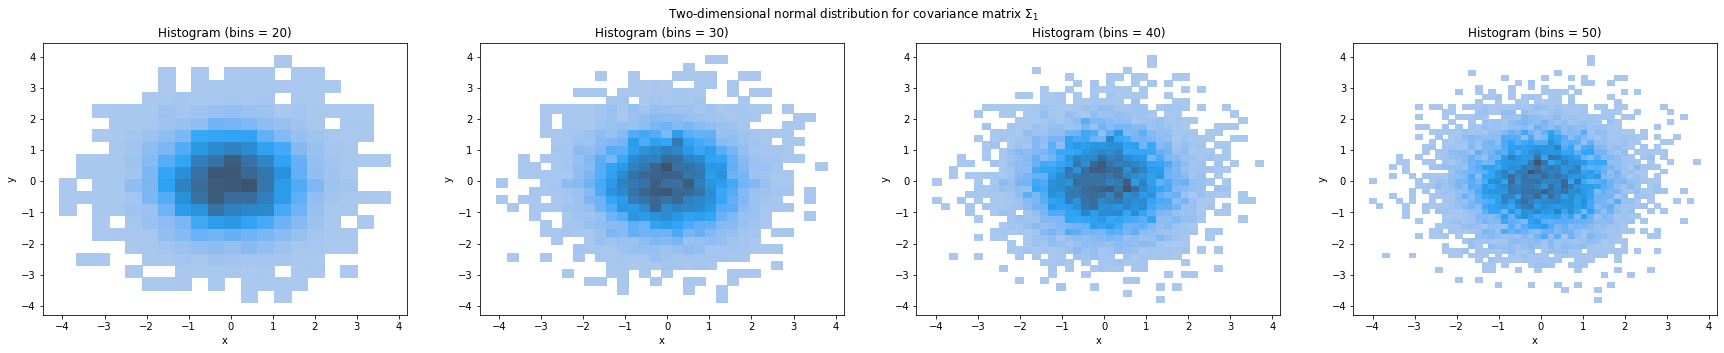

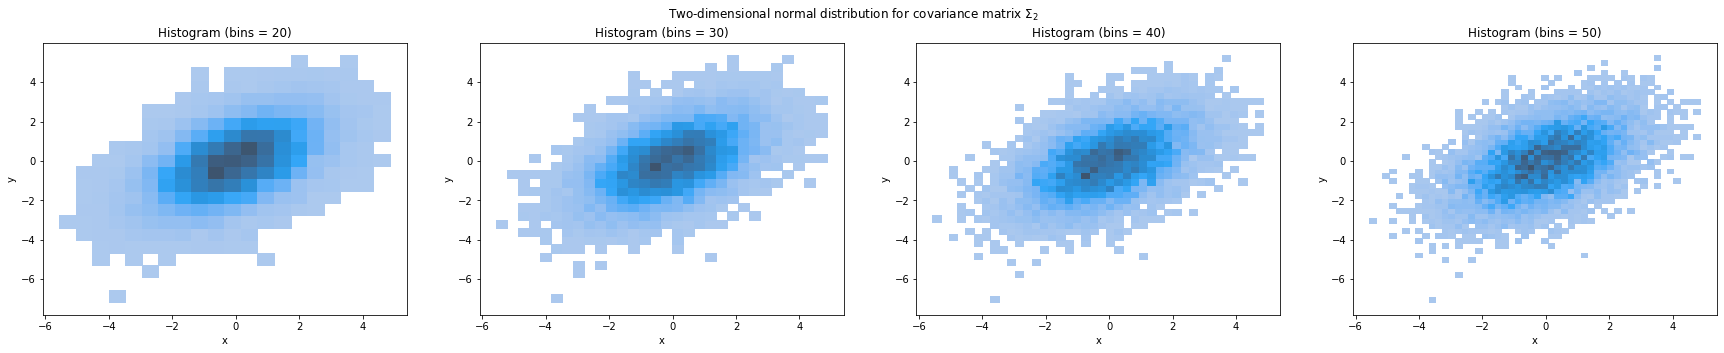

In [202]:
#seaborn
def plot_seaborn(data, bins, axis):
    dataFrame = pd.DataFrame(data, columns=['x_axis', 'y_axis'])
    sns.histplot(dataFrame, x="x_axis", y="y_axis", bins=bins, ax=axis)
    axis.set_title("Histogram (bins = " + str(bins) + ")")
    axis.set_xlabel("x")
    axis.set_ylabel("y")


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 5))
fig.suptitle(r'Two-dimensional normal distribution for covariance matrix $\Sigma_1$')

plot_seaborn(normal1_2D, bins=20, axis=ax1)
plot_seaborn(normal1_2D, bins=30, axis=ax2)
plot_seaborn(normal1_2D, bins=40, axis=ax3)
plot_seaborn(normal1_2D, bins=50, axis=ax4)



fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 5))
fig.suptitle(r'Two-dimensional normal distribution for covariance matrix $\Sigma_2$')

plot_seaborn(normal2_2D, bins=20, axis=ax1)
plot_seaborn(normal2_2D, bins=30, axis=ax2)
plot_seaborn(normal2_2D, bins=40, axis=ax3)
plot_seaborn(normal2_2D, bins=50, axis=ax4)

5. Generate 1000 points from the model

In [211]:
alpha = np.random.normal(2, 0.1, size=1000)
beta = np.random.normal(0.2, 0.2, size=1000)
x = np.random.normal(0, 3, size=1000)
sigma = np.abs(np.random.normal(0, 1, size=1000))
mu = alpha + (beta * x)
y = np.random.normal(mu, sigma, size=1000)

6. Plot y values as a function of x. Compare them with lines of y = alpha + beta  *x, plotted for x between -6 and 6 for each of randomly sampled alpha and beta pair (on the same plot).

Text(0.5, 1.0, 'Comparison')

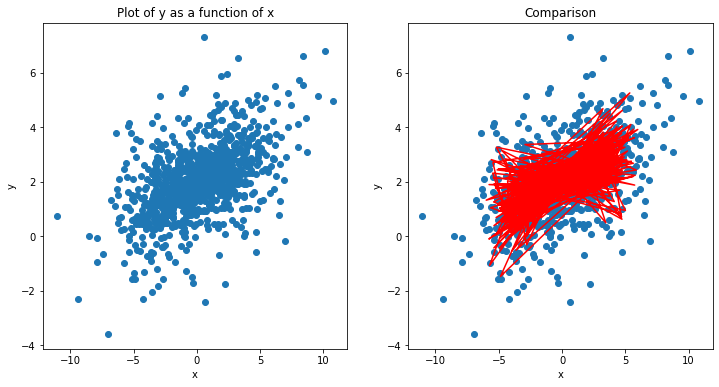

In [212]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(x, y)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plot of y as a function of x")

# Comparison
ax2.scatter(x, y)
ax2.set_xlabel("x")
ax2.set_ylabel("y")


y = alpha + beta * x
x_ = x[np.where((x > -6) & (x < 6))]
y_ = y[np.where((x > -6) & (x < 6))]
ax2.plot(x_, y_, 'r-')
ax2.set_title("Comparison")